# STOCK PRICE PREDICTION OF ICICI COMPANY(6 months ic_6m)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
ic_6m=pd.read_csv('ic_6.csv')
ic_6m

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-28,351.500000,363.950012,349.100006,363.000000,363.000000,18495592.0
1,2020-09-29,363.750000,363.750000,354.250000,357.049988,357.049988,17080848.0
2,2020-09-30,356.950012,357.500000,349.350006,354.750000,354.750000,19565058.0
3,2020-10-01,358.250000,371.200012,358.250000,369.200012,369.200012,23237122.0
4,2020-10-05,370.750000,382.649994,370.750000,373.100006,373.100006,26530105.0
...,...,...,...,...,...,...,...
120,2021-03-22,586.849976,586.849976,569.500000,573.450012,573.450012,21755401.0
121,2021-03-23,576.000000,589.250000,574.299988,586.400024,586.400024,29486417.0
122,2021-03-24,580.000000,580.549988,565.000000,567.500000,567.500000,24434219.0
123,2021-03-25,568.099976,579.000000,557.099976,571.549988,571.549988,27170186.0


# EXPLORATORY ic_6m ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF ic_6mSET
ic_6m.shape

(125, 7)

In [4]:
#CHECKING NULL VALUES IN ic_6mSET
ic_6m.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
#SINCE THE ic_6mSET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
ic_6m1=ic_6m.dropna()
ic_6m1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-28,351.500000,363.950012,349.100006,363.000000,363.000000,18495592.0
1,2020-09-29,363.750000,363.750000,354.250000,357.049988,357.049988,17080848.0
2,2020-09-30,356.950012,357.500000,349.350006,354.750000,354.750000,19565058.0
3,2020-10-01,358.250000,371.200012,358.250000,369.200012,369.200012,23237122.0
4,2020-10-05,370.750000,382.649994,370.750000,373.100006,373.100006,26530105.0
...,...,...,...,...,...,...,...
120,2021-03-22,586.849976,586.849976,569.500000,573.450012,573.450012,21755401.0
121,2021-03-23,576.000000,589.250000,574.299988,586.400024,586.400024,29486417.0
122,2021-03-24,580.000000,580.549988,565.000000,567.500000,567.500000,24434219.0
123,2021-03-25,568.099976,579.000000,557.099976,571.549988,571.549988,27170186.0


In [6]:
ic_6m1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#DESCIPTION OF ic_6mSET
ic_6m1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02
mean,518.666531,525.708469,510.636287,518.979433,518.979433,2.720165e+07
std,83.519857,84.338656,82.197668,82.956318,82.956318,1.043124e+07
min,351.500000,357.500000,349.100006,354.750000,354.750000,1.333090e+07
25%,473.675003,478.962494,466.324997,471.587509,471.587509,2.107317e+07
50%,521.299988,528.824982,515.724976,524.074982,524.074982,2.439108e+07
75%,595.449997,604.487518,578.375000,590.862503,590.862503,2.987300e+07
max,673.400024,679.400024,652.000000,673.950012,673.950012,7.269878e+07


In [8]:
#INFORMATION ABOUT ic_6mSET
ic_6m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       124 non-null    object 
 1   Open       124 non-null    float64
 2   High       124 non-null    float64
 3   Low        124 non-null    float64
 4   Close      124 non-null    float64
 5   Adj Close  124 non-null    float64
 6   Volume     124 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.8+ KB


In [9]:
ic_6m2 = ic_6m1.groupby('Date')[['Close']].mean()


In [10]:
ic_6m2

,Close
Date,
2020-09-28,363.000000
2020-09-29,357.049988
2020-09-30,354.750000
2020-10-01,369.200012
2020-10-05,373.100006
...,...
2021-03-22,573.450012
2021-03-23,586.400024
2021-03-24,567.500000


In [11]:
type(ic_6m1.Date[0])

str

# VISUALIZATION OF ic_6mSET

Text(0, 0.5, 'Price')

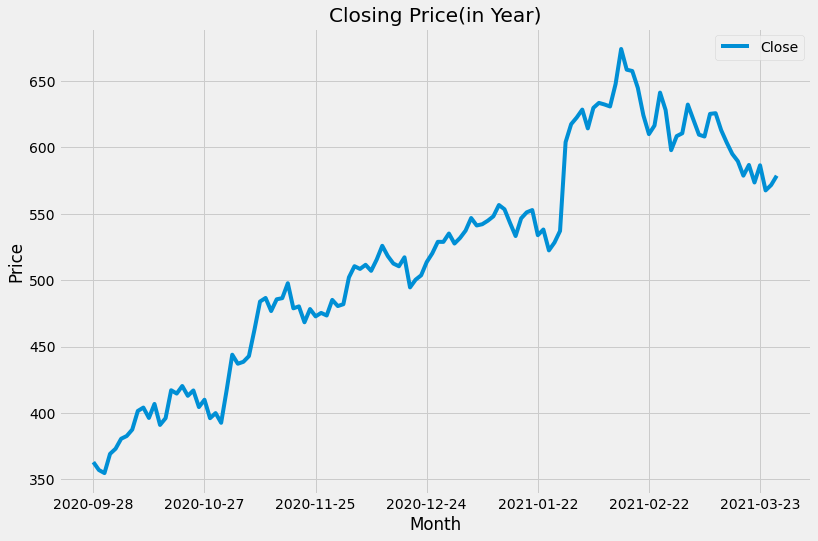

In [12]:
#plotting the graph with date againts closing price(in month)
ic_6m1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [13]:
ic_6m2

,Close
Date,
2020-09-28,363.000000
2020-09-29,357.049988
2020-09-30,354.750000
2020-10-01,369.200012
2020-10-05,373.100006
...,...
2021-03-22,573.450012
2021-03-23,586.400024
2021-03-24,567.500000


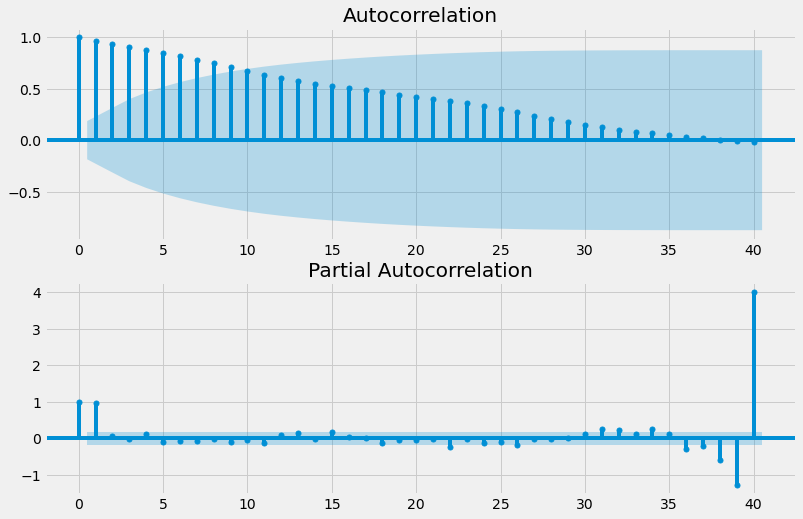

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ic_6m2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ic_6m2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [15]:
test_result=adfuller(ic_6m2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_6m has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [16]:
ic_6m2['Close First Difference'] = ic_6m2['Close'] - ic_6m2['Close'].shift(1)
ic_6m2['Close'].shift(1)


Date
2020-09-28           NaN
2020-09-29    363.000000
2020-09-30    357.049988
2020-10-01    354.750000
2020-10-05    369.200012
                 ...    
2021-03-22    586.650024
2021-03-23    573.450012
2021-03-24    586.400024
2021-03-25    567.500000
2021-03-26    571.549988
Name: Close, Length: 124, dtype: float64

ADF Test Statistic : -7.652384522308668
p-value : 1.775183969615339e-11
#Lags Used : 2
Number of Observations Used : 120
strong evidence against the null hypothesis(Ho), reject the null hypothesis. ic_6m has no unit root and is stationary


Text(0, 0.5, 'Price')

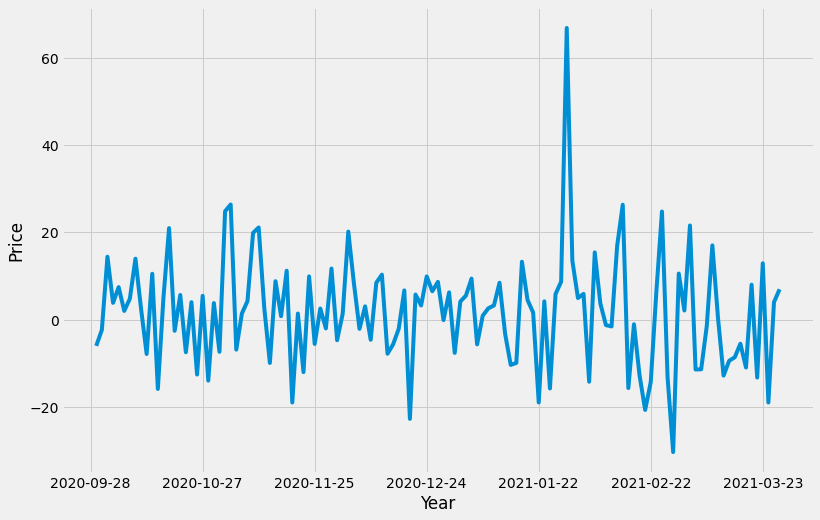

In [17]:
adfuller_test(ic_6m2['Close First Difference'].dropna())
ic_6m2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [18]:
stepwise_fit = auto_arima(ic_6m2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=979.668, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=975.696, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=977.584, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=977.582, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=976.065, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=979.582, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.681 seconds


In [19]:
train_ic_6m, test_ic_6m = ic_6m2[0:int(len(ic_6m2)*0.7)], ic_6m2[int(len(ic_6m2)*0.7):]
training_ic_6m = train_ic_6m['Close'].values
test_ic_6m = test_ic_6m['Close'].values
history = [x for x in training_ic_6m]
model_predictions = []
N_test_observations = len(test_ic_6m)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_ic_6m[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_ic_6m, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 191.2108676852923


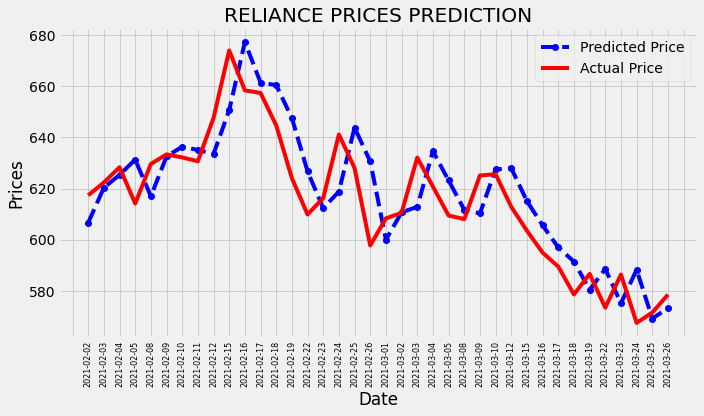

In [30]:
test_set_range = ic_6m2[int(len(ic_6m2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_ic_6m, color='red', label='Actual Price')
plt.title('RELIANCE PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), ic_6m2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
pred=model_fit.predict(start=len(ic_6m2),end=len(ic_6m2)+30,typ='levels')
print(pred)

[573.25941413 574.96884026 576.67826639 578.38769252 580.09711866
 581.80654479 583.51597092 585.22539705 586.93482318 588.64424931
 590.35367544 592.06310157 593.7725277  595.48195384 597.19137997
 598.9008061  600.61023223 602.31965836 604.02908449 605.73851062
 607.44793675 609.15736289 610.86678902 612.57621515 614.28564128
 615.99506741 617.70449354 619.41391967 621.1233458  622.83277193
 624.54219807 626.2516242 ]


In [26]:
# model performance
mse = mean_squared_error(test_ic_6m, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_ic_6m,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_ic_6m, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs((model_predictions - test_ic_6m))/np.abs(test_ic_6m))
print('MAPE: '+str(mape))

MSE: 191.2108676852923
MAE: 11.590513945936754
RMSE: 13.82790178173436
MAPE: 0.04590627043910239
